In [2]:
import fastai
import torch
from fastai.vision.all import *
from tqdm import tqdm
from torch.utils.data import dataloader

In [3]:
path = Path('../input/pnevmoniya/train')
fls = get_image_files(path)

In [20]:
# Datablock
pnevmoniya = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.1, seed=7),
    get_y = parent_label,
    item_tfms = Resize(128)
)

# Data loaders
dls = pnevmoniya.dataloaders(path)

# Train
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(7) # 7 martta validation qiladi.

/opt/conda/lib/python3.7/site-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy,time
0,0.496050,0.189320,0.932822,02:35


epoch,train_loss,valid_loss,accuracy,time
0,0.196406,0.085323,0.975048,02:35
1,0.127539,0.066491,0.978887,02:37
2,0.083237,0.042332,0.984645,02:42
3,0.051739,0.053543,0.982726,02:44
4,0.029526,0.047640,0.982726,02:42
5,0.024177,0.038449,0.986564,02:42
6,0.017553,0.035257,0.988484,02:41


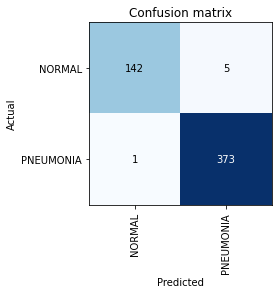

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(7)

In [22]:
files = !ls "../input/pnevmoniya/test"
preds = []
numbers = []
for file in tqdm(files):
    number, n_th, probs = learn.predict(f"../input/pnevmoniya/test/{file}")
    preds.append(n_th)
    numbers.append(number)

  0%|          | 0/624 [00:00<?, ?it/s]

  0%|          | 1/624 [00:00<01:12,  8.62it/s]

  0%|          | 2/624 [00:00<01:42,  6.04it/s]

  1%|          | 4/624 [00:00<01:07,  9.18it/s]

  1%|          | 5/624 [00:00<01:18,  7.86it/s]

  1%|          | 7/624 [00:00<01:04,  9.58it/s]

  1%|▏         | 9/624 [00:00<00:55, 11.11it/s]

  2%|▏         | 11/624 [00:01<00:52, 11.74it/s]

  2%|▏         | 13/624 [00:01<00:45, 13.49it/s]

  2%|▏         | 15/624 [00:01<00:47, 12.77it/s]

  3%|▎         | 17/624 [00:01<00:43, 13.87it/s]

  3%|▎         | 19/624 [00:01<00:42, 14.20it/s]

  3%|▎         | 21/624 [00:01<00:53, 11.26it/s]

  4%|▎         | 23/624 [00:02<00:49, 12.09it/s]

  4%|▍         | 25/624 [00:02<00:50, 11.87it/s]

  4%|▍         | 27/624 [00:02<00:49, 12.13it/s]

  5%|▍         | 29/624 [00:02<00:48, 12.31it/s]

  5%|▍         | 31/624 [00:02<00:51, 11.58it/s]

  5%|▌         | 33/624 [00:02<00:47, 12.53it/s]

  6%|▌         | 35/624 [00:02<00:42, 13.73it/s]

  6%|▌         | 37/624 [00:03<00:44, 13.33it/s]

  6%|▋         | 39/624 [00:03<00:41, 13.96it/s]

  7%|▋         | 41/624 [00:03<00:42, 13.57it/s]

  7%|▋         | 43/624 [00:03<00:50, 11.42it/s]

  7%|▋         | 45/624 [00:03<00:50, 11.54it/s]

  8%|▊         | 47/624 [00:04<00:53, 10.80it/s]

  8%|▊         | 49/624 [00:04<00:51, 11.12it/s]

  8%|▊         | 51/624 [00:04<00:56, 10.23it/s]

  8%|▊         | 53/624 [00:04<00:58,  9.81it/s]

  9%|▉         | 55/624 [00:04<00:54, 10.40it/s]

  9%|▉         | 57/624 [00:04<00:48, 11.67it/s]

  9%|▉         | 59/624 [00:05<00:50, 11.11it/s]

 10%|▉         | 61/624 [00:05<00:51, 10.99it/s]

 10%|█         | 63/624 [00:05<00:48, 11.64it/s]

 10%|█         | 65/624 [00:05<00:54, 10.34it/s]

 11%|█         | 67/624 [00:05<01:01,  9.05it/s]

 11%|█         | 68/624 [00:06<01:05,  8.49it/s]

 11%|█         | 69/624 [00:06<01:26,  6.39it/s]

 11%|█         | 70/624 [00:06<01:23,  6.63it/s]

 11%|█▏        | 71/624 [00:06<01:33,  5.89it/s]

 12%|█▏        | 72/624 [00:06<01:32,  5.98it/s]

 12%|█▏        | 73/624 [00:07<01:23,  6.62it/s]

 12%|█▏        | 75/624 [00:07<01:08,  8.06it/s]

 12%|█▏        | 77/624 [00:07<00:59,  9.22it/s]

 13%|█▎        | 79/624 [00:07<00:49, 10.94it/s]

 13%|█▎        | 81/624 [00:07<00:45, 11.80it/s]

 13%|█▎        | 83/624 [00:07<00:47, 11.46it/s]

 14%|█▎        | 85/624 [00:08<00:44, 12.15it/s]

 14%|█▍        | 87/624 [00:08<00:41, 13.00it/s]

 14%|█▍        | 89/624 [00:08<00:39, 13.60it/s]

 15%|█▍        | 91/624 [00:08<00:40, 13.31it/s]

 15%|█▍        | 93/624 [00:08<00:38, 13.80it/s]

 15%|█▌        | 95/624 [00:08<00:41, 12.70it/s]

 16%|█▌        | 97/624 [00:08<00:47, 11.04it/s]

 16%|█▌        | 99/624 [00:09<00:49, 10.69it/s]

 16%|█▌        | 101/624 [00:09<00:43, 12.13it/s]

 17%|█▋        | 103/624 [00:09<00:40, 12.71it/s]

 17%|█▋        | 105/624 [00:09<00:39, 13.16it/s]

 17%|█▋        | 107/624 [00:09<00:47, 10.96it/s]

 17%|█▋        | 109/624 [00:10<00:50, 10.17it/s]

 18%|█▊        | 111/624 [00:10<00:49, 10.29it/s]

 18%|█▊        | 113/624 [00:10<00:51,  9.86it/s]

 18%|█▊        | 115/624 [00:10<00:53,  9.53it/s]

 19%|█▉        | 117/624 [00:10<00:52,  9.75it/s]

 19%|█▉        | 118/624 [00:11<01:01,  8.24it/s]

 19%|█▉        | 119/624 [00:11<01:00,  8.40it/s]

 19%|█▉        | 120/624 [00:11<01:04,  7.82it/s]

 20%|█▉        | 122/624 [00:11<00:54,  9.20it/s]

 20%|█▉        | 124/624 [00:11<00:45, 11.08it/s]

 20%|██        | 126/624 [00:11<00:44, 11.17it/s]

 21%|██        | 128/624 [00:11<00:40, 12.19it/s]

 21%|██        | 130/624 [00:12<00:41, 11.92it/s]

 21%|██        | 132/624 [00:12<00:38, 12.67it/s]

 21%|██▏       | 134/624 [00:12<00:38, 12.72it/s]

 22%|██▏       | 136/624 [00:12<00:45, 10.82it/s]

 22%|██▏       | 138/624 [00:12<00:47, 10.30it/s]

 22%|██▏       | 140/624 [00:13<00:42, 11.28it/s]

 23%|██▎       | 142/624 [00:13<00:41, 11.50it/s]

 23%|██▎       | 144/624 [00:13<00:38, 12.41it/s]

 23%|██▎       | 146/624 [00:13<00:36, 13.13it/s]

 24%|██▎       | 148/624 [00:13<00:35, 13.45it/s]

 24%|██▍       | 150/624 [00:13<00:36, 12.91it/s]

 24%|██▍       | 152/624 [00:13<00:35, 13.16it/s]

 25%|██▍       | 154/624 [00:14<00:34, 13.79it/s]

 25%|██▌       | 156/624 [00:14<00:34, 13.63it/s]

 25%|██▌       | 158/624 [00:14<00:33, 13.73it/s]

 26%|██▌       | 160/624 [00:14<00:36, 12.70it/s]

 26%|██▌       | 162/624 [00:14<00:38, 12.04it/s]

 26%|██▋       | 164/624 [00:14<00:37, 12.30it/s]

 27%|██▋       | 166/624 [00:15<00:39, 11.47it/s]

 27%|██▋       | 168/624 [00:15<00:36, 12.33it/s]

 27%|██▋       | 170/624 [00:15<00:35, 12.85it/s]

 28%|██▊       | 172/624 [00:15<00:33, 13.57it/s]

 28%|██▊       | 174/624 [00:15<00:33, 13.43it/s]

 28%|██▊       | 176/624 [00:15<00:36, 12.11it/s]

 29%|██▊       | 178/624 [00:15<00:38, 11.72it/s]

 29%|██▉       | 180/624 [00:16<00:36, 12.25it/s]

 29%|██▉       | 182/624 [00:16<00:35, 12.46it/s]

 29%|██▉       | 184/624 [00:16<00:37, 11.87it/s]

 30%|██▉       | 186/624 [00:16<00:35, 12.46it/s]

 30%|███       | 188/624 [00:16<00:35, 12.44it/s]

 30%|███       | 190/624 [00:16<00:32, 13.23it/s]

 31%|███       | 192/624 [00:17<00:32, 13.31it/s]

 31%|███       | 194/624 [00:17<00:39, 10.84it/s]

 31%|███▏      | 196/624 [00:17<00:39, 10.82it/s]

 32%|███▏      | 198/624 [00:17<00:36, 11.79it/s]

 32%|███▏      | 200/624 [00:17<00:35, 12.02it/s]

 32%|███▏      | 202/624 [00:17<00:34, 12.18it/s]

 33%|███▎      | 204/624 [00:18<00:34, 12.34it/s]

 33%|███▎      | 206/624 [00:18<00:34, 12.06it/s]

 33%|███▎      | 208/624 [00:18<00:32, 12.67it/s]

 34%|███▎      | 210/624 [00:18<00:36, 11.35it/s]

 34%|███▍      | 212/624 [00:18<00:33, 12.45it/s]

 34%|███▍      | 214/624 [00:19<00:37, 10.91it/s]

 35%|███▍      | 216/624 [00:19<00:41,  9.89it/s]

 35%|███▍      | 218/624 [00:19<00:38, 10.47it/s]

 35%|███▌      | 220/624 [00:19<00:36, 11.10it/s]

 36%|███▌      | 222/624 [00:19<00:40,  9.88it/s]

 36%|███▌      | 224/624 [00:19<00:37, 10.72it/s]

 36%|███▌      | 226/624 [00:20<00:33, 11.86it/s]

 37%|███▋      | 228/624 [00:20<00:35, 11.22it/s]

 37%|███▋      | 230/624 [00:20<00:32, 12.17it/s]

 37%|███▋      | 232/624 [00:20<00:34, 11.21it/s]

 38%|███▊      | 234/624 [00:20<00:33, 11.80it/s]

 38%|███▊      | 236/624 [00:21<00:35, 11.00it/s]

 38%|███▊      | 238/624 [00:21<00:36, 10.69it/s]

 38%|███▊      | 240/624 [00:21<00:34, 11.02it/s]

 39%|███▉      | 242/624 [00:21<00:35, 10.80it/s]

 39%|███▉      | 244/624 [00:21<00:41,  9.10it/s]

 39%|███▉      | 246/624 [00:22<00:41,  9.08it/s]

 40%|███▉      | 247/624 [00:22<00:46,  8.11it/s]

 40%|███▉      | 249/624 [00:22<00:49,  7.61it/s]

 40%|████      | 251/624 [00:22<00:41,  8.95it/s]

 41%|████      | 253/624 [00:22<00:36, 10.22it/s]

 41%|████      | 255/624 [00:22<00:32, 11.33it/s]

 41%|████      | 257/624 [00:23<00:30, 12.07it/s]

 42%|████▏     | 259/624 [00:23<00:32, 11.40it/s]

 42%|████▏     | 261/624 [00:23<00:29, 12.44it/s]

 42%|████▏     | 263/624 [00:23<00:28, 12.86it/s]

 42%|████▏     | 265/624 [00:23<00:27, 13.12it/s]

 43%|████▎     | 267/624 [00:23<00:32, 11.06it/s]

 43%|████▎     | 269/624 [00:24<00:33, 10.69it/s]

 43%|████▎     | 271/624 [00:24<00:29, 11.99it/s]

 44%|████▍     | 273/624 [00:24<00:26, 13.08it/s]

 44%|████▍     | 275/624 [00:24<00:25, 13.50it/s]

 44%|████▍     | 277/624 [00:24<00:32, 10.73it/s]

 45%|████▍     | 279/624 [00:24<00:28, 12.14it/s]

 45%|████▌     | 281/624 [00:25<00:26, 12.80it/s]

 45%|████▌     | 283/624 [00:25<00:30, 11.17it/s]

 46%|████▌     | 285/624 [00:25<00:27, 12.44it/s]

 46%|████▌     | 287/624 [00:25<00:31, 10.76it/s]

 46%|████▋     | 289/624 [00:25<00:28, 11.93it/s]

 47%|████▋     | 291/624 [00:26<00:32, 10.28it/s]

 47%|████▋     | 293/624 [00:26<00:33,  9.97it/s]

 47%|████▋     | 295/624 [00:26<00:32, 10.08it/s]

 48%|████▊     | 297/624 [00:26<00:29, 10.98it/s]

 48%|████▊     | 299/624 [00:26<00:27, 12.02it/s]

 48%|████▊     | 301/624 [00:26<00:24, 13.12it/s]

 49%|████▊     | 303/624 [00:27<00:27, 11.60it/s]

 49%|████▉     | 305/624 [00:27<00:25, 12.39it/s]

 49%|████▉     | 307/624 [00:27<00:27, 11.33it/s]

 50%|████▉     | 309/624 [00:27<00:27, 11.52it/s]

 50%|████▉     | 311/624 [00:27<00:28, 11.08it/s]

 50%|█████     | 313/624 [00:27<00:25, 12.22it/s]

 50%|█████     | 315/624 [00:28<00:24, 12.48it/s]

 51%|█████     | 317/624 [00:28<00:22, 13.58it/s]

 51%|█████     | 319/624 [00:28<00:23, 13.10it/s]

 51%|█████▏    | 321/624 [00:28<00:22, 13.61it/s]

 52%|█████▏    | 323/624 [00:28<00:21, 14.20it/s]

 52%|█████▏    | 325/624 [00:28<00:21, 14.08it/s]

 52%|█████▏    | 327/624 [00:28<00:22, 13.31it/s]

 53%|█████▎    | 329/624 [00:29<00:22, 13.08it/s]

 53%|█████▎    | 331/624 [00:29<00:21, 13.65it/s]

 53%|█████▎    | 333/624 [00:29<00:21, 13.58it/s]

 54%|█████▎    | 335/624 [00:29<00:29,  9.85it/s]

 54%|█████▍    | 337/624 [00:29<00:27, 10.59it/s]

 54%|█████▍    | 339/624 [00:30<00:25, 11.32it/s]

 55%|█████▍    | 341/624 [00:30<00:27, 10.21it/s]

 55%|█████▍    | 343/624 [00:30<00:25, 11.02it/s]

 55%|█████▌    | 345/624 [00:30<00:27, 10.15it/s]

 56%|█████▌    | 347/624 [00:30<00:26, 10.40it/s]

 56%|█████▌    | 349/624 [00:30<00:23, 11.66it/s]

 56%|█████▋    | 351/624 [00:31<00:24, 11.10it/s]

 57%|█████▋    | 353/624 [00:31<00:23, 11.70it/s]

 57%|█████▋    | 355/624 [00:31<00:21, 12.62it/s]

 57%|█████▋    | 357/624 [00:31<00:20, 13.17it/s]

 58%|█████▊    | 359/624 [00:31<00:20, 13.12it/s]

 58%|█████▊    | 361/624 [00:31<00:23, 11.23it/s]

 58%|█████▊    | 363/624 [00:32<00:21, 12.30it/s]

 58%|█████▊    | 365/624 [00:32<00:19, 13.00it/s]

 59%|█████▉    | 367/624 [00:32<00:18, 13.57it/s]

 59%|█████▉    | 369/624 [00:32<00:24, 10.42it/s]

 59%|█████▉    | 371/624 [00:32<00:27,  9.29it/s]

 60%|█████▉    | 373/624 [00:33<00:25,  9.73it/s]

 60%|██████    | 375/624 [00:33<00:27,  9.15it/s]

 60%|██████    | 376/624 [00:33<00:27,  9.12it/s]

 61%|██████    | 378/624 [00:33<00:24, 10.20it/s]

 61%|██████    | 380/624 [00:33<00:26,  9.21it/s]

 61%|██████    | 382/624 [00:34<00:23, 10.15it/s]

 62%|██████▏   | 384/624 [00:34<00:21, 11.35it/s]

 62%|██████▏   | 386/624 [00:34<00:21, 11.30it/s]

 62%|██████▏   | 388/624 [00:34<00:20, 11.77it/s]

 62%|██████▎   | 390/624 [00:34<00:18, 12.92it/s]

 63%|██████▎   | 392/624 [00:34<00:19, 12.18it/s]

 63%|██████▎   | 394/624 [00:34<00:18, 12.49it/s]

 63%|██████▎   | 396/624 [00:35<00:17, 13.08it/s]

 64%|██████▍   | 398/624 [00:35<00:17, 13.16it/s]

 64%|██████▍   | 400/624 [00:35<00:19, 11.35it/s]

 64%|██████▍   | 402/624 [00:35<00:18, 11.69it/s]

 65%|██████▍   | 404/624 [00:35<00:18, 11.75it/s]

 65%|██████▌   | 406/624 [00:35<00:20, 10.75it/s]

 65%|██████▌   | 408/624 [00:36<00:18, 11.51it/s]

 66%|██████▌   | 410/624 [00:36<00:18, 11.61it/s]

 66%|██████▌   | 412/624 [00:36<00:16, 13.04it/s]

 66%|██████▋   | 414/624 [00:36<00:15, 13.75it/s]

 67%|██████▋   | 416/624 [00:36<00:14, 14.73it/s]

 67%|██████▋   | 418/624 [00:36<00:14, 14.14it/s]

 67%|██████▋   | 420/624 [00:36<00:13, 15.06it/s]

 68%|██████▊   | 422/624 [00:37<00:13, 15.53it/s]

 68%|██████▊   | 424/624 [00:37<00:12, 15.63it/s]

 68%|██████▊   | 426/624 [00:37<00:12, 15.96it/s]

 69%|██████▊   | 428/624 [00:37<00:12, 15.35it/s]

 69%|██████▉   | 430/624 [00:37<00:12, 15.37it/s]

 69%|██████▉   | 432/624 [00:37<00:13, 14.05it/s]

 70%|██████▉   | 434/624 [00:37<00:12, 14.84it/s]

 70%|██████▉   | 436/624 [00:37<00:12, 15.16it/s]

 70%|███████   | 438/624 [00:38<00:12, 14.86it/s]

 71%|███████   | 440/624 [00:38<00:11, 15.65it/s]

 71%|███████   | 442/624 [00:38<00:11, 15.69it/s]

 71%|███████   | 444/624 [00:38<00:14, 12.76it/s]

 71%|███████▏  | 446/624 [00:38<00:12, 13.79it/s]

 72%|███████▏  | 448/624 [00:38<00:11, 14.71it/s]

 72%|███████▏  | 450/624 [00:38<00:12, 13.43it/s]

 72%|███████▏  | 452/624 [00:39<00:14, 11.75it/s]

 73%|███████▎  | 454/624 [00:39<00:15, 11.10it/s]

 73%|███████▎  | 456/624 [00:39<00:17,  9.82it/s]

 73%|███████▎  | 458/624 [00:39<00:17,  9.49it/s]

 74%|███████▎  | 460/624 [00:40<00:16,  9.80it/s]

 74%|███████▍  | 462/624 [00:40<00:15, 10.20it/s]

 74%|███████▍  | 464/624 [00:40<00:14, 11.11it/s]

 75%|███████▍  | 466/624 [00:40<00:12, 12.50it/s]

 75%|███████▌  | 468/624 [00:40<00:12, 12.44it/s]

 75%|███████▌  | 470/624 [00:40<00:11, 13.52it/s]

 76%|███████▌  | 472/624 [00:40<00:10, 14.30it/s]

 76%|███████▌  | 474/624 [00:41<00:10, 14.20it/s]

 76%|███████▋  | 476/624 [00:41<00:09, 15.03it/s]

 77%|███████▋  | 478/624 [00:41<00:09, 15.55it/s]

 77%|███████▋  | 480/624 [00:41<00:08, 16.28it/s]

 77%|███████▋  | 482/624 [00:41<00:08, 17.18it/s]

 78%|███████▊  | 485/624 [00:41<00:07, 18.57it/s]

 78%|███████▊  | 488/624 [00:41<00:07, 19.02it/s]

 79%|███████▊  | 491/624 [00:41<00:07, 18.83it/s]

 79%|███████▉  | 493/624 [00:42<00:08, 16.12it/s]

 79%|███████▉  | 496/624 [00:42<00:07, 17.71it/s]

 80%|███████▉  | 499/624 [00:42<00:06, 18.41it/s]

 80%|████████  | 501/624 [00:42<00:06, 18.09it/s]

 81%|████████  | 503/624 [00:42<00:06, 17.41it/s]

 81%|████████  | 505/624 [00:42<00:07, 16.88it/s]

 81%|████████▏ | 507/624 [00:42<00:06, 16.92it/s]

 82%|████████▏ | 510/624 [00:43<00:06, 18.11it/s]

 82%|████████▏ | 512/624 [00:43<00:06, 18.52it/s]

 83%|████████▎ | 515/624 [00:43<00:05, 19.27it/s]

 83%|████████▎ | 517/624 [00:43<00:05, 18.85it/s]

 83%|████████▎ | 519/624 [00:43<00:05, 18.46it/s]

 83%|████████▎ | 521/624 [00:43<00:07, 13.74it/s]

 84%|████████▍ | 523/624 [00:44<00:08, 12.07it/s]

 84%|████████▍ | 525/624 [00:44<00:08, 11.53it/s]

 84%|████████▍ | 527/624 [00:44<00:08, 10.84it/s]

 85%|████████▍ | 529/624 [00:44<00:08, 11.15it/s]

 85%|████████▌ | 531/624 [00:44<00:07, 12.06it/s]

 85%|████████▌ | 533/624 [00:44<00:07, 12.75it/s]

 86%|████████▌ | 535/624 [00:45<00:06, 12.77it/s]

 86%|████████▌ | 537/624 [00:45<00:06, 13.39it/s]

 86%|████████▋ | 539/624 [00:45<00:06, 13.36it/s]

 87%|████████▋ | 541/624 [00:45<00:06, 13.32it/s]

 87%|████████▋ | 543/624 [00:45<00:05, 13.58it/s]

 87%|████████▋ | 545/624 [00:45<00:05, 13.59it/s]

 88%|████████▊ | 547/624 [00:45<00:05, 13.60it/s]

 88%|████████▊ | 549/624 [00:46<00:05, 14.06it/s]

 88%|████████▊ | 551/624 [00:46<00:04, 14.65it/s]

 89%|████████▊ | 553/624 [00:46<00:05, 13.90it/s]

 89%|████████▉ | 555/624 [00:46<00:05, 13.50it/s]

 89%|████████▉ | 557/624 [00:46<00:05, 12.53it/s]

 90%|████████▉ | 559/624 [00:46<00:05, 12.11it/s]

 90%|████████▉ | 561/624 [00:46<00:05, 12.04it/s]

 90%|█████████ | 563/624 [00:47<00:04, 12.52it/s]

 91%|█████████ | 565/624 [00:47<00:04, 13.68it/s]

 91%|█████████ | 567/624 [00:47<00:03, 15.01it/s]

 91%|█████████▏| 570/624 [00:47<00:03, 16.89it/s]

 92%|█████████▏| 572/624 [00:47<00:03, 16.88it/s]

 92%|█████████▏| 575/624 [00:47<00:02, 17.90it/s]

 93%|█████████▎| 578/624 [00:47<00:02, 18.05it/s]

 93%|█████████▎| 580/624 [00:48<00:02, 18.22it/s]

 93%|█████████▎| 583/624 [00:48<00:02, 19.60it/s]

 94%|█████████▍| 585/624 [00:48<00:02, 19.43it/s]

 94%|█████████▍| 587/624 [00:48<00:02, 18.42it/s]

 94%|█████████▍| 589/624 [00:48<00:01, 18.67it/s]

 95%|█████████▍| 591/624 [00:48<00:01, 18.49it/s]

 95%|█████████▌| 593/624 [00:48<00:01, 18.71it/s]

 95%|█████████▌| 595/624 [00:48<00:01, 18.68it/s]

 96%|█████████▌| 597/624 [00:48<00:01, 18.64it/s]

 96%|█████████▌| 599/624 [00:49<00:01, 17.85it/s]

 96%|█████████▋| 601/624 [00:49<00:01, 14.58it/s]

 97%|█████████▋| 603/624 [00:49<00:01, 13.04it/s]

 97%|█████████▋| 605/624 [00:49<00:01, 11.28it/s]

 97%|█████████▋| 607/624 [00:49<00:01, 12.56it/s]

 98%|█████████▊| 609/624 [00:49<00:01, 13.44it/s]

 98%|█████████▊| 611/624 [00:50<00:01, 11.61it/s]

 98%|█████████▊| 613/624 [00:50<00:00, 11.90it/s]

 99%|█████████▊| 616/624 [00:50<00:00, 14.42it/s]

 99%|█████████▉| 618/624 [00:50<00:00, 12.77it/s]

 99%|█████████▉| 620/624 [00:50<00:00, 13.69it/s]

100%|█████████▉| 622/624 [00:50<00:00, 11.86it/s]

100%|██████████| 624/624 [00:51<00:00, 12.21it/s]


In [23]:
predict = []
for num in numbers:
    if num == 'NORMAL':
        predict.append(0)
    elif num == 'PNEUMONIA':
        predict.append(1)

In [24]:
df = pd.read_csv('../input/pnevmoniya/sample_solution.csv')
df.head()

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0


In [25]:
len(predict)

624

In [26]:
df['labels'] = predict
df.head()

,id,labels
0,test_img_10001.jpeg,1
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,1
3,test_img_10004.jpeg,1
4,test_img_10005.jpeg,0


In [27]:
df.to_csv('pnevmoniya3.2.csv', index=False)